# Multicolour planet candidate validation
## Ground-based photometry and TESS

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Import and initialize MultiColour Validation LPF

The `muscat2ta.MCVLPF` (MultiColour Validation LPF) class takes care of the colour validation model optimisation and MCMC sampling. 

In [2]:
from mcv import MCVLPF

In [10]:
lpf = MCVLPF(4479.01)
lpf.read_tess()
lpf.read_m2()
lpf.read_m3(heavy_baseline=True)
lpf.read_lco_file('photometry/lco/TIC_126606859-01_20211010_LCO-Teid-1.0m_ip_12pix_measurements.xls', 'i', 'LCO')
lpf.finish_setup()

Fetching data from https://exofop.ipac.caltech.edu/tess/download_toi.php?output=pipe&toi=4479.01


In [11]:
lpf.ps

[  0 |G| tc             N(μ = 2459420.757858, σ = 0.004821776)   [    -inf ..      inf],
   1 |G| p              N(μ = 1.15880481196006, σ = 0.00037940804) [    0.00 ..      inf],
   2 |G| rho            U(a = 1, b = 35)                         [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |P| k2_app         U(a = 0.00162, b = 0.00487)              [    0.00 ..      inf],
   5 |G| k2_true        U(a = 0.0004, b = 0.9025)                [    0.00 ..      inf],
   6 |G| teff_h         N(μ = 3449.0, σ = 157.0)                 [ 2500.00 .. 12000.00],
   7 |G| teff_c         U(a = 2500, b = 12000)                   [ 2500.00 .. 12000.00],
   8 |G| k2_app_tess    U(a = 0.00162, b = 0.00487)              [    0.00 ..      inf],
   9 |P| q1_tess        N(μ = 0.80317, σ = 0.00205)              [    0.00 ..     1.00],
  10 |P| q2_tess        N(μ = 0.67949, σ = 0.06003)              [    0.00 ..     1.00],
  11 |P| q1_g      

Global optimisation:   0%|          | 0/2000 [00:00<?, ?it/s]

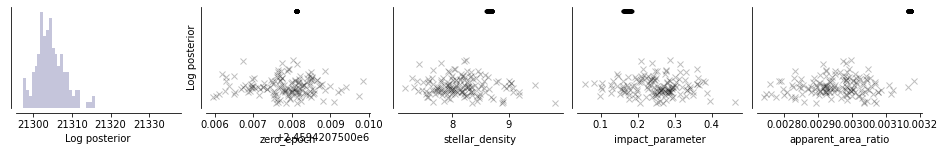

In [22]:
lpf.optimize_global(2000, npop=150)

[0.995, 1.005]

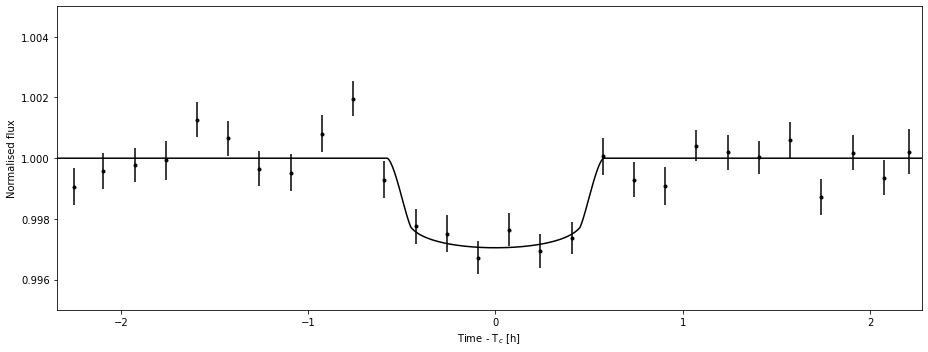

In [23]:
fig = lpf.plot_folded_tess_transit(plot_model=True, plot_unbinned=False, plot_binned=True, figsize=(13,5), binwidth=10);
setp(fig.axes, ylim=(0.995, 1.005))

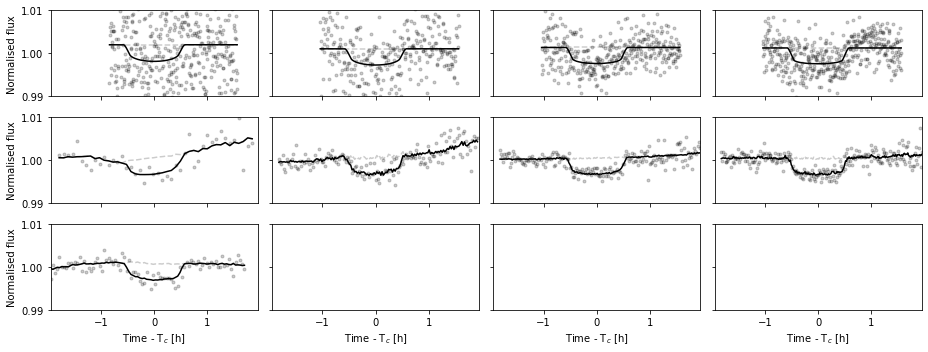

In [24]:
lpf.plot_gb_transits(figsize=(13,5), ylim=(0.99, 1.01), remove_baseline=False);

In [27]:
lpf.sample_mcmc(15000, 50, 4, save=True)

MCMC sampling:   0%|          | 0/2 [00:00<?, ?it/s]

Run 1/2:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 2/2:   0%|          | 0/15000 [00:00<?, ?it/s]

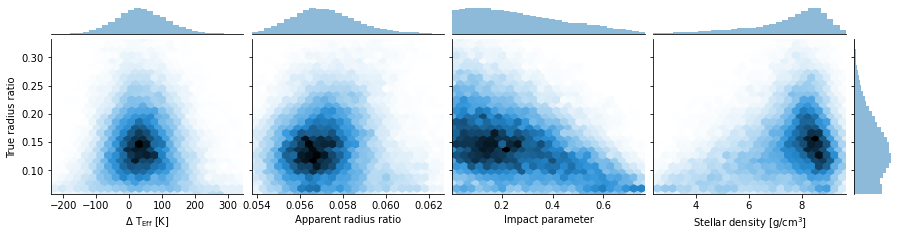

In [28]:
lpf.plot_joint_marginals();